# HR ATTRIBUTION

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [2]:
df = pd.read_csv("HR_Analytics.csv")

In [3]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [4]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

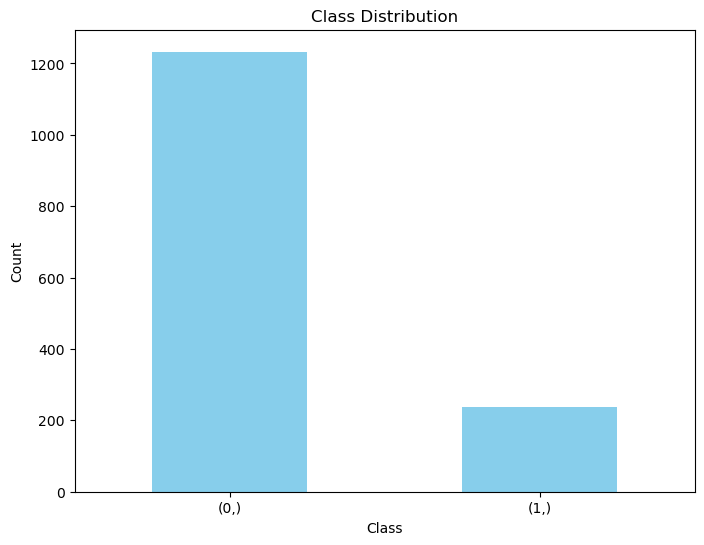

In [5]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [6]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)




In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.79


In [9]:
#overfit model with 100% accuracy

# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [10]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [11]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

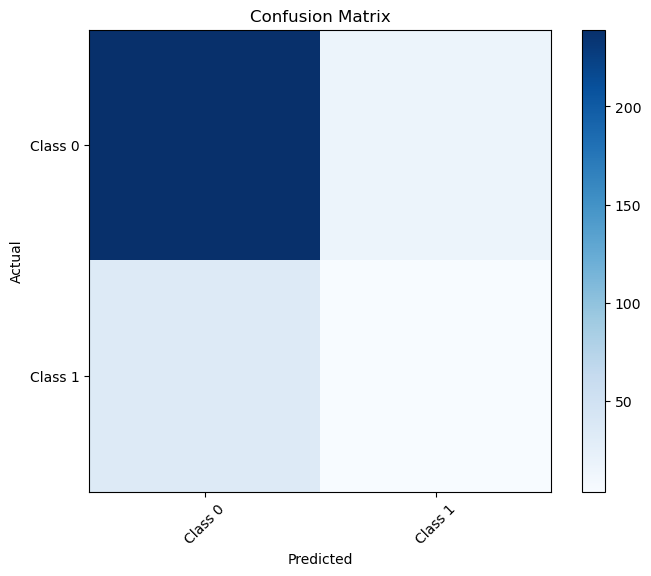

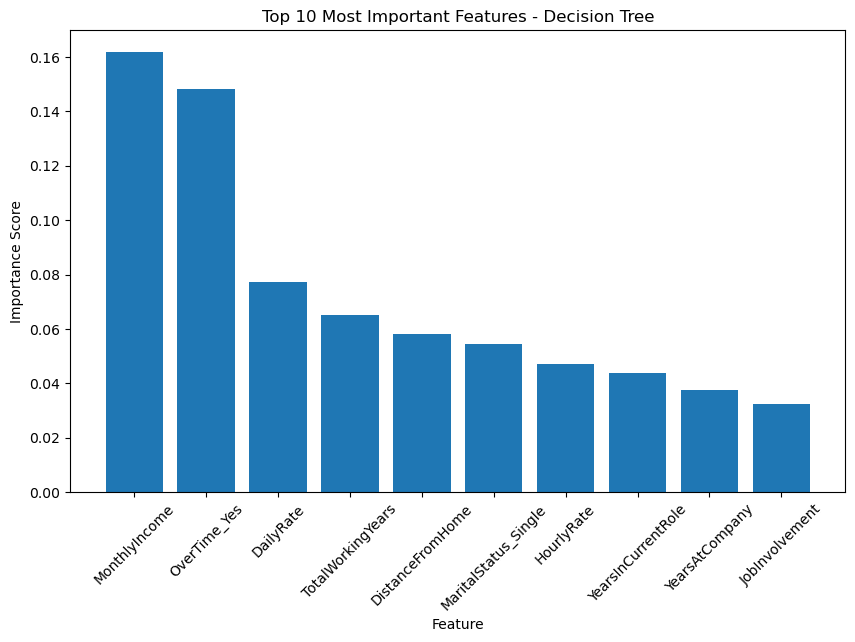

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object') instead.

<Figure size 1200x600 with 0 Axes>

In [12]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True, fontsize=7)
plt.title('Decision Tree Classifier')
plt.show()



# 5.) Looking at the graphs. what would be your suggestions to try to improve employ retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

## ANSWER :

In [13]:
#Increase monthly income;
#Need more info about employer's attitude towards overtime;

In [14]:
from scipy.stats import pearsonr

In [15]:
def calculate_correlation(X,feature_name,y):
    feature=X(feature_name)
    
    coef,_=pearsonr(feature,y)
    return(coef)

In [16]:
np.corrcoef(np.array(X["OverTime_Yes"]),np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

# 6.) Using the Training Data, if they made everyone work overtime. What would have been the expected difference in client retention?

In [47]:
x_train_experiment=x_train.copy()

In [48]:
x_train_experiment["OverTime_Yes"]=0.

In [49]:
y_pred=clf.predict(x_train)
y_pred_experiment=clf.predict(x_train_experiment)

In [50]:
diff=sum(y_pred_experiment-y_pred)

In [51]:
print("difference in client retention:",diff)

difference in client retention: -59


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [52]:
x_train_experiment["Y"]=y_pred
x_train_experiment["Y_exp"]=y_pred_experiment

In [53]:
x_train_experiment["Ret_change"]=x_train_experiment["Y_exp"]-x_train_experiment["Y"]

In [54]:
sav=sum(-2.8*x_train_experiment["Ret_change"]*x_train_experiment["MonthlyIncome"])

In [55]:
cost=len(x_train[x_train["OverTime_Yes"]==1])*2000

In [56]:
sav-cost

-117593.99999999977

## ANSWER : 

In [57]:
#To keep them working overtime si more profitable.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [72]:
raise_amount=100

In [73]:
    x_train_experiment=x_train.copy()
    x_train_experiment["MonthlyIncome"]=x_train_experiment["MonthlyIncome"]+raise_amount
    y_pred=clf.predict(x_train)
    y_pred_experiment=clf.predict(x_train_experiment)
    diff=sum(y_pred-y_pred_experiment)
    x_train_experiment["Y"]=y_pred
    x_train_experiment["Y_exp"]=y_pred_experiment
    x_train_experiment["Ret_change"]=x_train_experiment["Y_exp"]-x_train_experiment["Y"]
    sav=sum(-2.8*x_train_experiment["Ret_change"]*x_train_experiment["MonthlyIncome"])
    cost=len(x_train)*raise_amount
print('profit,',sav-cost)

profit, -75328.40000000001


In [69]:
profit=[]
for raise_amount in range(-1000,1000,100):
    x_train_experiment=x_train.copy()
    x_train_experiment["MonthlyIncome"]=x_train_experiment["MonthlyIncome"]+raise_amount
    y_pred=clf.predict(x_train)
    y_pred_experiment=clf.predict(x_train_experiment)
    diff=sum(y_pred-y_pred_experiment)
    x_train_experiment["Y"]=y_pred
    x_train_experiment["Y_exp"]=y_pred_experiment
    x_train_experiment["Ret_change"]=x_train_experiment["Y_exp"]-x_train_experiment["Y"]
    sav=sum(-2.8*x_train_experiment["Ret_change"]*x_train_experiment["MonthlyIncome"])
    cost=len(x_train)*raise_amount
    profit.append(sav-cost)

In [70]:
print(profit)

[1087584.4, 979524.0, 864992.8, 750738.8, 629778.8, 530138.0, 424200.0, 326096.4, 228440.8, 110714.8, 0.0, -75328.40000000001, -127503.60000000002, -240914.8, -311586.80000000005, -416449.6000000001, -527889.6000000001, -639329.6000000001, -750769.6000000001, -854999.6000000001]


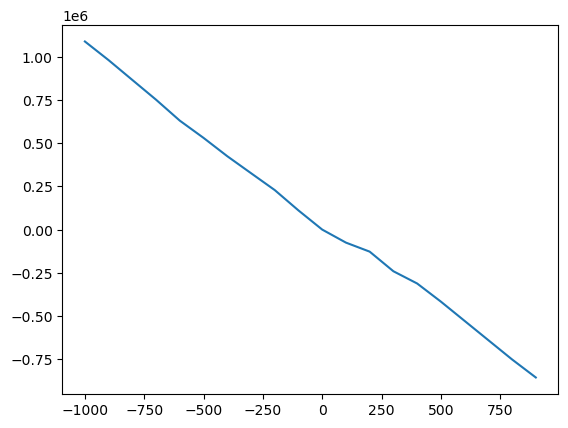

In [71]:
plt.plot(range(-1000,1000,100),profit)
plt.show()

## ANSWER : 

In [32]:
#This means even though the company raises the salary, there is still cost more than money, therefore its better
#to just keep workers working overtime.